<a href="https://colab.research.google.com/github/Shalinid8/Autoencoder_UMAP/blob/main/Autoencoder_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
import os
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2

!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=2aa55046965989db9a8182d926f105d699b956cdec3d6c34d48ef58ddbfbe4fe
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=673952d9304fbde5e9b557acf88c8713f53f6dc1c8132e250f857ff4f0d82a5e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:

folder_path = "/content/drive/MyDrive/Lung_Cancer/images"

file_names = os.listdir(folder_path)

images = []


for file_name in file_names:
      file_path = os.path.join(folder_path, file_name)

      gray_img = cv2.cvtColor(np.array(Image.open(file_path)), cv2.COLOR_RGB2GRAY)
      resized_image = cv2.resize(gray_img, (28, 28))
      images.append(resized_image)

images = np.array(images)

# Split the data into training and testing sets
x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training images shape:", x_train.shape)
print("Testing images shape:", x_test.shape)


Training images shape: (2512, 28, 28)
Testing images shape: (628, 28, 28)


In [ ]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(2512, 28, 28)
(628, 28, 28)


In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
79/79 [==============================] - 2s 8ms/step - loss: 0.0180 - val_loss: 0.0135
Epoch 2/10
79/79 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 3/10
79/79 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 4/10
79/79 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 5/10
79/79 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 6/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 7/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0088 - val_loss: 0.0087
Epoch 8/10
79/79 [==============================] - 1s 7ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 9/10
79/79 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0073 - val_loss: 0.0073


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

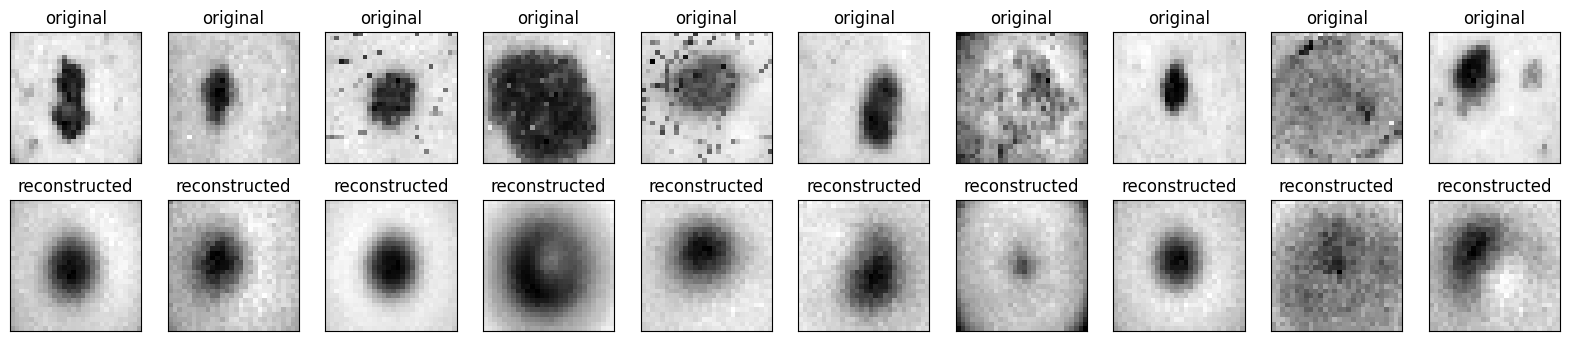

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

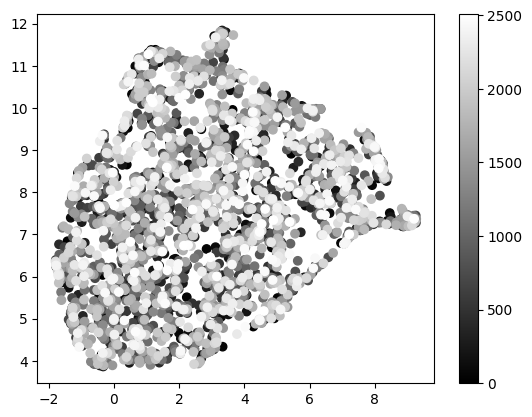

In [ ]:
import umap.umap_ as umap

# Encode the test set
encoded_imgs = autoencoder.encoder(x_train).numpy()

# Fit UMAP to the encoded latent space
umap_reducer = umap.UMAP()
umap_embedding = umap_reducer.fit_transform(encoded_imgs)

# Visualize the embedding
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=np.arange(len(x_train)))
plt.colorbar()
plt.show()
